<a href="https://colab.research.google.com/github/DiegoOrtiz08/ProyectoVentasAguacates/blob/main/Proyecto_2_Aguacate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objetivo**

El objetivo principal de este trabajo es desarrollar un modelo de análisis de series de tiempo que pueda predecir el precio promedio semanal de los aguacates en varias regiones de Estados Unidos. Para lograr esto, se trabajará con un conjunto de datos que contiene información histórica sobre el precio promedio de los aguacates en distintas semanas y regiones.

# **Dependencias**

In [ ]:
!pip install -U scikit-learn
import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt

#import warnings
#warnings.simplefilter(action='ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 105
mpl.rcParams['figure.figsize'] = (9, 7)

In [ ]:
!pip install -U plotly
import plotly
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 78.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
plt.style.use('seaborn')  # Elige el estilo seaborn
plt.rcParams['grid.color'] = 'white'  # Establece el color de las líneas de cuadrícula en blanco
plt.rcParams['axes.edgecolor'] = 'white'  # Establece el color de los bordes de los ejes en blanco
plt.rcParams['axes.facecolor'] = '#cfddfc'  # Establece el color de fondo del gráfico en azul

plt.show()

<ipython-input-356-062861641033>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



# **Conjunto de datos**

El siguiente *dataset* representa los datos de escaneo minorista semanales de 2018 para el volumen (unidades) y precio minorista nacional (de Estados Unidos). Los datos de escaneo minorista provienen directamente de las cajas registradoras de los minoristas, basados en ventas minoristas reales de aguacates Hass. A partir de 2013, la tabla a continuación refleja un conjunto de datos minoristas ampliado y multiplataforma. El informe de múltiples plataformas incluye una agregación de los siguientes canales: supermercados, masas, clubes, droguerías, dólares y militares. El precio promedio (de los aguacates) en la tabla refleja un costo por unidad (por aguacate), incluso cuando se venden múltiples unidades (aguacates) en bolsas. Los códigos de búsqueda de productos (PLU) en la tabla son solo para aguacates Hass. Otras variedades de aguacates (por ejemplo, verdes) no se incluyen en esta tabla.
Las siguientes son algunas columnas relevantes en el conjunto de datos:

* Date: La fecha de la observación.
* AveragePrice: El precio promedio de un solo aguacate.
* type: Convencional u orgánico.
* year: El año.
* Region: La ciudad o región de la observación.
* Total Volume: El número total de aguacates vendidos.
* 4046: El número total de aguacates con el código PLU 4046 vendidos.
* 4225: El número total de aguacates con el código PLU 4225 vendidos.
* 4770: El número total de aguacates con el código PLU 4770 vendidos.


      (Tomado y modificado de 'Hass Avocado Board website')



In [ ]:
# link = https://www.kaggle.com/datasets/neuromusic/avocado-prices?resource=download

avocado = '/content/avocado.csv'
df_av = pd.read_csv(avocado)

In [ ]:
df_av.sample(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1605,45,2015-02-15,1.11,288514.78,2897.82,232117.81,33.13,53466.02,53303.80,162.22,0.00,conventional,2015,NorthernNewEngland
563,43,2015-03-01,1.03,136795.35,55610.59,36034.55,25775.13,19375.08,13297.29,1837.60,4240.19,conventional,2015,Columbus
12349,0,2016-12-25,1.34,33412.35,52.77,30236.66,0.00,3122.92,3122.92,0.00,0.00,organic,2016,Chicago
7138,38,2017-04-09,1.75,1277721.97,37746.37,775729.89,2839.80,461405.91,407168.08,51164.80,3073.03,conventional,2017,NewYork
15914,7,2017-11-12,1.98,62337.67,8390.23,17805.25,0.00,36142.19,36097.73,44.46,0.00,organic,2017,LosAngeles
13163,34,2016-05-01,1.35,2389.94,4.98,1190.05,0.00,1194.91,324.22,870.69,0.00,organic,2016,Louisville
4538,14,2016-09-18,1.00,826738.90,377761.66,206297.66,11915.14,230764.44,93337.58,137426.86,0.00,conventional,2016,PhoenixTucson
13667,18,2016-08-21,2.08,9183.92,4111.69,2936.92,0.00,2135.31,523.78,1611.53,0.00,organic,2016,PhoenixTucson
9216,38,2015-04-05,1.74,5558.81,1595.31,3073.37,0.00,890.13,40.46,849.67,0.00,organic,2015,Atlanta
12681,20,2016-08-07,2.03,1794.39,1069.54,187.76,0.00,537.09,500.00,37.09,0.00,organic,2016,GrandRapids


In [ ]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df_av.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
df_av.sort_values(by='Date')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [ ]:
df_av.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

# **Gráfica y selección**

In [ ]:
df_av['Date'] = pd.to_datetime(df_av['Date'])

In [ ]:
def grafica_tipo_region(tipo, region, grafica=True):
    # Se crea nparray, organizado por fecha, en el que se selecciona el Tipo de aguacate que se quiere visualizar ('organic' o 'conventional') y la Región:
    my_series=df_av[(df_av["type"]==tipo) & (df_av["region"]==region)].sort_values(by='Date').set_index('Date')['AveragePrice']
    # Se convierten los valores de la columna de fechas a tipo datetime
    if grafica:
        # Se visualiza los valores de precio promedio por fecha (del 04-01-2015 al 25-03-2018):
        my_series.plot(rot=90, figsize = (15, 4), fontsize = 13.5)
        plt.title(f"Precio promedio del valor de un aguacate tipo {tipo} en la región de {region} por semana \n (del 04-01-2015 al 25-03-2018)", fontsize=16)
    else:
        # Se muestra el DataFrame
        return my_series

In [ ]:
grafica_tipo_region('organic', 'Boston', grafica=False)

Date
2015-01-04    1.83
2015-01-11    1.94
2015-01-18    2.00
2015-01-25    2.01
2015-02-01    1.78
              ... 
2018-02-25    1.79
2018-03-04    1.92
2018-03-11    1.85
2018-03-18    1.83
2018-03-25    1.74
Name: AveragePrice, Length: 169, dtype: float64

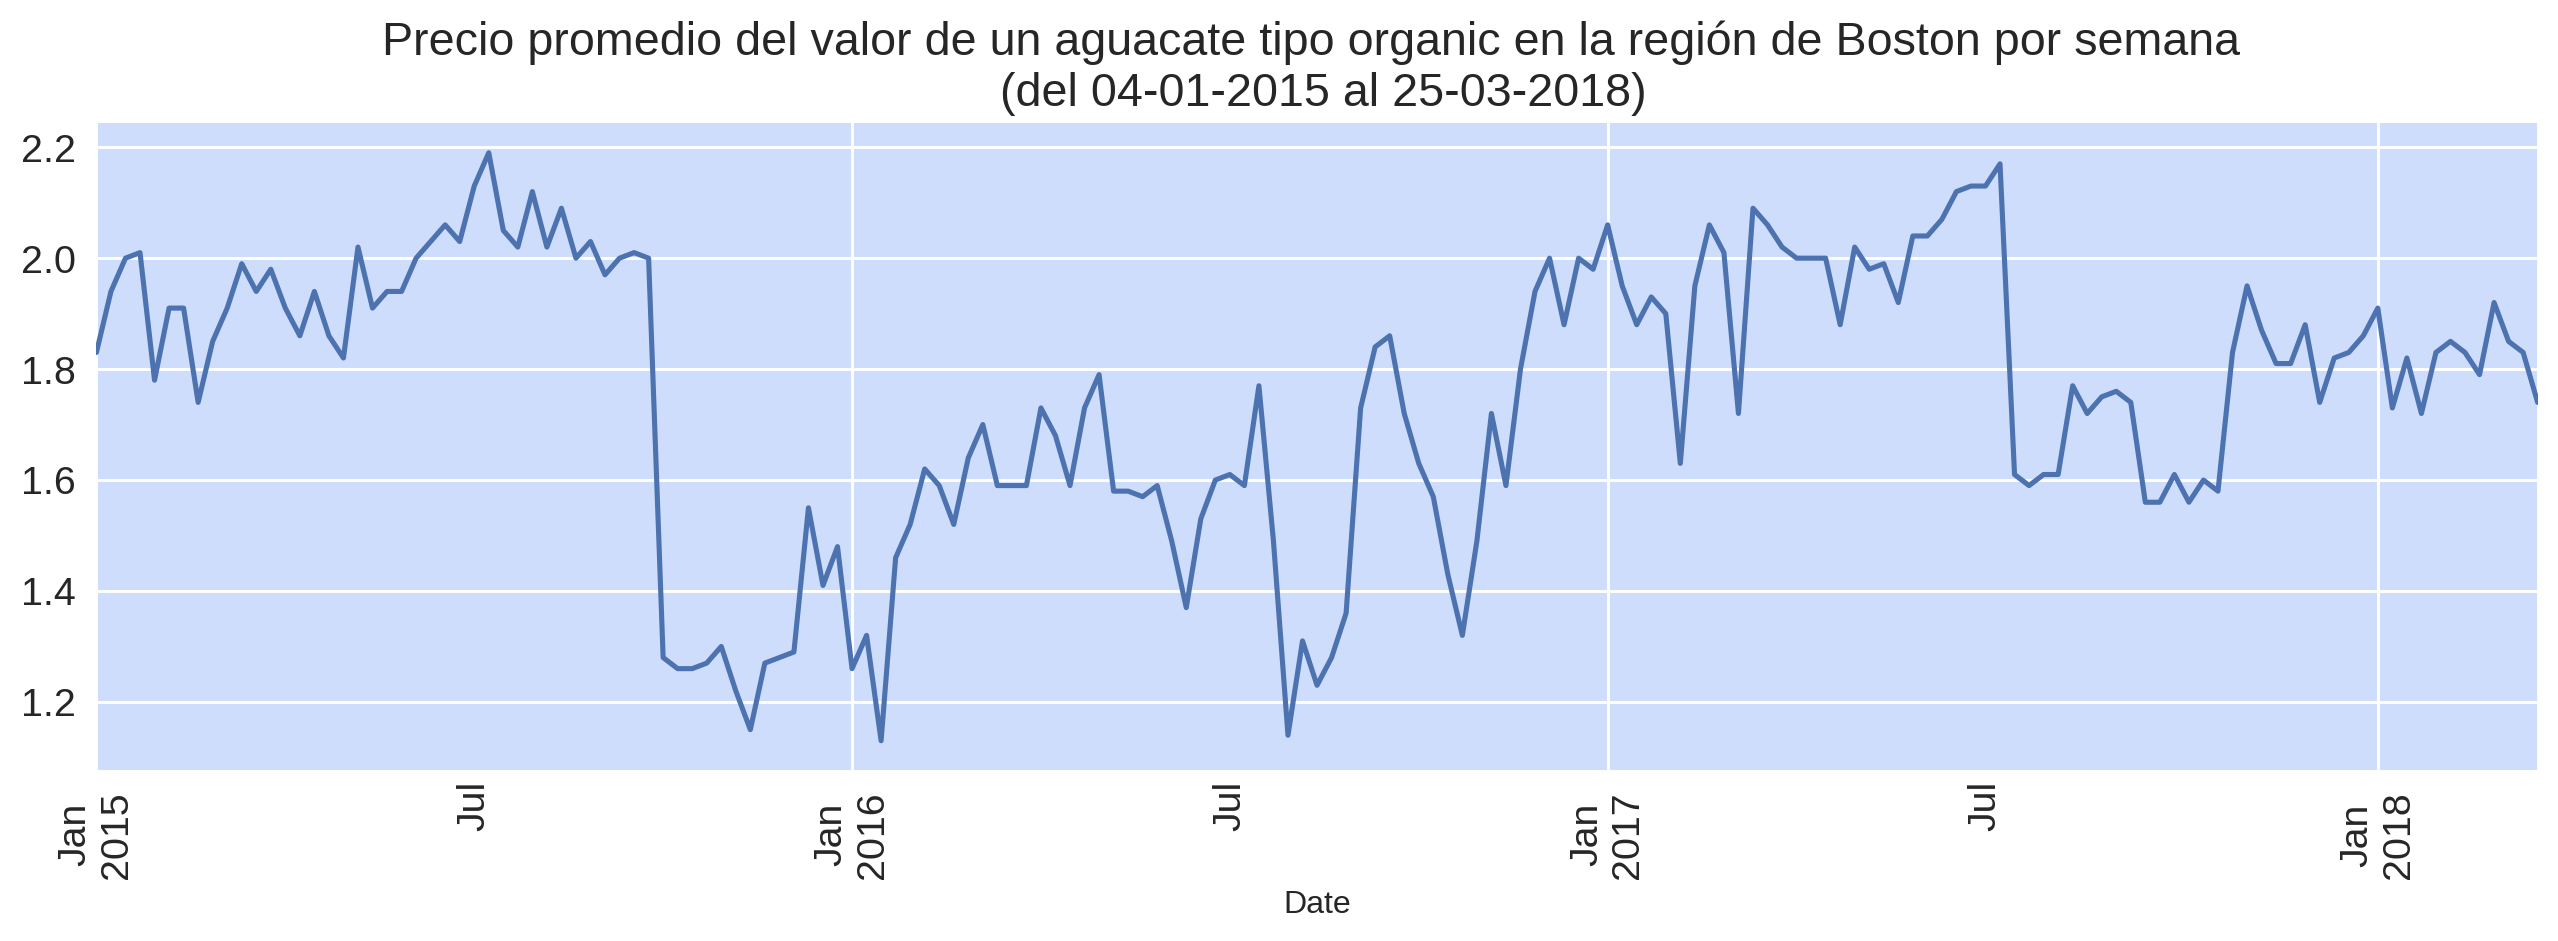

In [ ]:
grafica_tipo_region('organic', 'Boston')

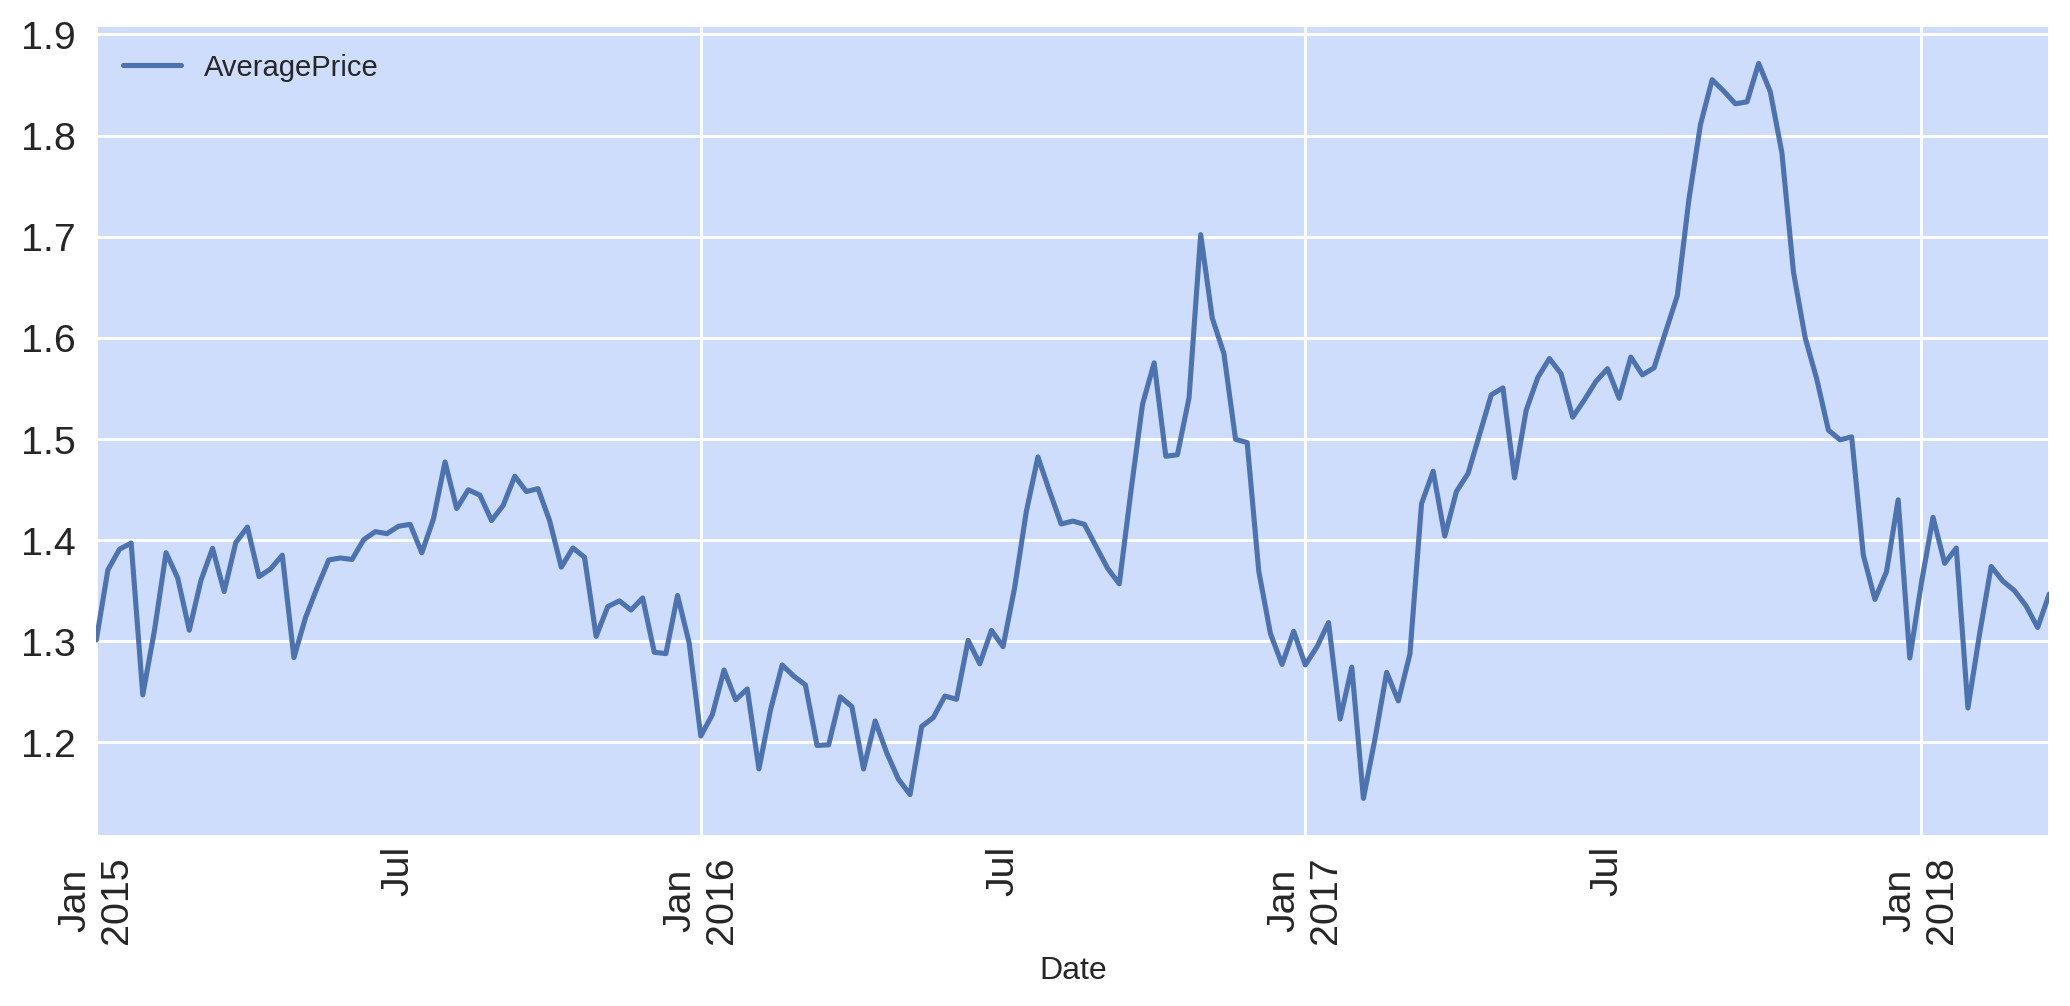

In [ ]:
df_av[['Date', "AveragePrice"]].groupby('Date').mean().plot(rot=90, figsize = (12, 5), fontsize = 13.5);

In [ ]:
from sklearn.model_selection import train_test_split

my_series = grafica_tipo_region('organic', 'Boston', grafica=False)
my_series1 = pd.Series(my_series.values , my_series.index + pd.DateOffset(years=3, months=3))
my_series2 = pd.Series(my_series.values , my_series.index + pd.DateOffset(years=6, months=6))

# Concatenar los DataFrames
my_series = pd.concat([my_series, my_series1, my_series2], axis=0).sort_index()

print(my_series)

Date
2015-01-04    1.83
2015-01-11    1.94
2015-01-18    2.00
2015-01-25    2.01
2015-02-01    1.78
              ... 
2024-08-25    1.79
2024-09-04    1.92
2024-09-11    1.85
2024-09-18    1.83
2024-09-25    1.74
Length: 507, dtype: float64


# **Series de tiempo**

In [ ]:
data_train, data_test = train_test_split(my_series, test_size=0.3, shuffle=False)

k=30

In [ ]:
def sliding_time(ts, window_size=1):

  n = ts.shape[0] - window_size
  X = np.empty((n, window_size))
  y = np.empty(n)

  for i in range(window_size, ts.shape[0]):
    y[i - window_size] = ts[i]
    X[i- window_size, 0:window_size] = np.array(ts[i - window_size:i])

  return X, y

In [ ]:
X_train, y_train = sliding_time(data_train.values, window_size=k)
X_test, y_test = sliding_time(data_test.values, window_size=k)

In [ ]:
print(data_train)

Date
2015-01-04    1.83
2015-01-11    1.94
2015-01-18    2.00
2015-01-25    2.01
2015-02-01    1.78
              ... 
2021-09-22    1.94
2021-09-29    1.98
2021-10-05    1.91
2021-10-12    1.86
2021-10-19    1.94
Length: 354, dtype: float64


In [ ]:
print(data_test)

Date
2021-10-26    1.86
2021-11-03    1.82
2021-11-10    2.02
2021-11-17    1.91
2021-11-24    1.94
              ... 
2024-08-25    1.79
2024-09-04    1.92
2024-09-11    1.85
2024-09-18    1.83
2024-09-25    1.74
Length: 153, dtype: float64


In [ ]:
print(f"Número de ejemplos de entrenamiento: {X_train.shape[0]} (Ventana de tamaño {X_train.shape[1]})")
print(f"Número de valores a predecir: {y_train.shape[0]}")
print(f"Número de ejemplos de entrenamiento: {X_test.shape[0]} (Ventana de tamaño {X_test.shape[1]})")
print(f"Número de valores a predecir: {y_test.shape[0]}")

Número de ejemplos de entrenamiento: 324 (Ventana de tamaño 30)
Número de valores a predecir: 324
Número de ejemplos de entrenamiento: 123 (Ventana de tamaño 30)
Número de valores a predecir: 123


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.83,1.94,2.00,2.01,1.78,1.91,1.91,1.74,1.85,1.91,...,1.94,1.94,2.00,2.03,2.06,2.03,2.13,2.19,2.05,2.02
1,1.94,2.00,2.01,1.78,1.91,1.91,1.74,1.85,1.91,1.99,...,1.94,2.00,2.03,2.06,2.03,2.13,2.19,2.05,2.02,2.12
2,2.00,2.01,1.78,1.91,1.91,1.74,1.85,1.91,1.99,1.94,...,2.00,2.03,2.06,2.03,2.13,2.19,2.05,2.02,2.12,2.02
3,2.01,1.78,1.91,1.91,1.74,1.85,1.91,1.99,1.94,1.98,...,2.03,2.06,2.03,2.13,2.19,2.05,2.02,2.12,2.02,2.09
4,1.78,1.91,1.91,1.74,1.85,1.91,1.99,1.94,1.98,1.91,...,2.06,2.03,2.13,2.19,2.05,2.02,2.12,2.02,2.09,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1.81,1.81,1.88,1.74,1.82,1.83,1.86,1.91,1.73,1.82,...,1.94,2.00,2.01,1.78,1.91,1.91,1.74,1.85,1.91,1.99
320,1.81,1.88,1.74,1.82,1.83,1.86,1.91,1.73,1.82,1.72,...,2.00,2.01,1.78,1.91,1.91,1.74,1.85,1.91,1.99,1.94
321,1.88,1.74,1.82,1.83,1.86,1.91,1.73,1.82,1.72,1.83,...,2.01,1.78,1.91,1.91,1.74,1.85,1.91,1.99,1.94,1.98
322,1.74,1.82,1.83,1.86,1.91,1.73,1.82,1.72,1.83,1.85,...,1.78,1.91,1.91,1.74,1.85,1.91,1.99,1.94,1.98,1.91


In [ ]:
pd.Series(y_train)

0      2.12
1      2.02
2      2.09
3      2.00
4      2.03
       ... 
319    1.94
320    1.98
321    1.91
322    1.86
323    1.94
Length: 324, dtype: float64

In [ ]:
# Selección de los datos en series de tiempo
from sklearn.model_selection import TimeSeriesSplit

# Definimos el número de splits para realizar cross-validation
tsp = TimeSeriesSplit(n_splits=3)

In [ ]:
for i, (train_index, test_index) in enumerate(tsp.split(X_train, y_train)):

  print(f'-------------------- Pliegue {i + 1} --------------------')
  print("\tPartición de entrenamiento")
  print(f'\t\tTamaño de la partición: {train_index.shape}')
  print(f'\t\tRango de valores: {train_index[0]}-{train_index[-1]}\n')

  print("\tPartición de validación")
  print(f'\t\tTamaño de la partición: {test_index.shape}')
  print(f'\t\tRango de valores: {test_index[0]}-{test_index[-1]}\n')

-------------------- Pliegue 1 --------------------
	Partición de entrenamiento
		Tamaño de la partición: (81,)
		Rango de valores: 0-80

	Partición de validación
		Tamaño de la partición: (81,)
		Rango de valores: 81-161

-------------------- Pliegue 2 --------------------
	Partición de entrenamiento
		Tamaño de la partición: (162,)
		Rango de valores: 0-161

	Partición de validación
		Tamaño de la partición: (81,)
		Rango de valores: 162-242

-------------------- Pliegue 3 --------------------
	Partición de entrenamiento
		Tamaño de la partición: (243,)
		Rango de valores: 0-242

	Partición de validación
		Tamaño de la partición: (81,)
		Rango de valores: 243-323



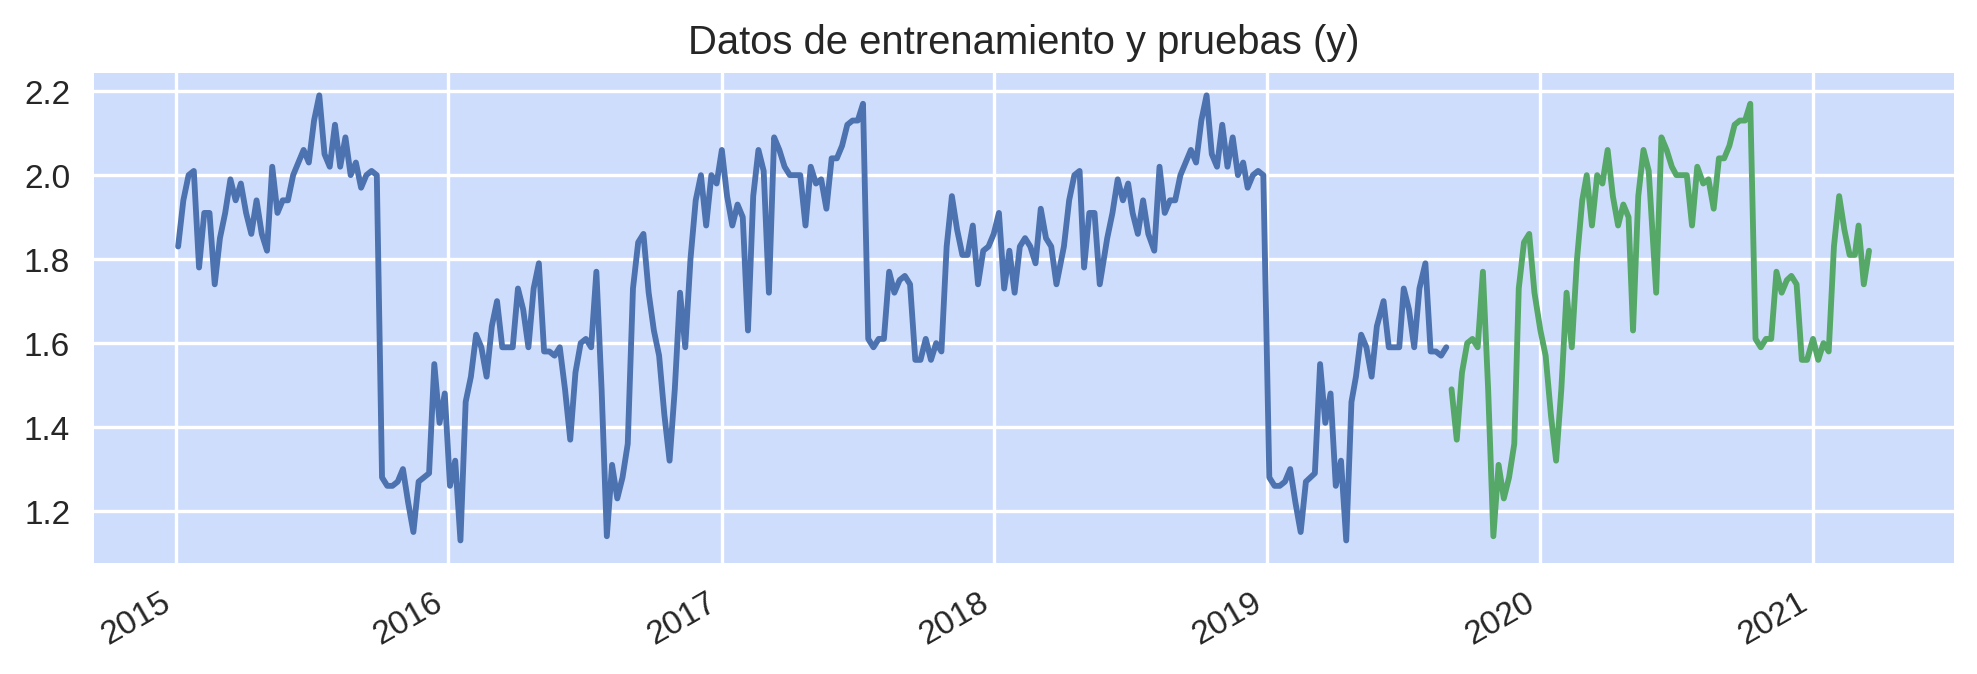

In [ ]:
# Datos de prueba y entrenamiento con Matplotlib
tsp_indexes = [(train_index, test_index) for (train_index, test_index) in tsp.split(X_train, y_train)]

train_index, test_index = tsp_indexes[-1]

fig = plt.figure(dpi = 120, figsize = (10, 3))
plt.plot(my_series[train_index].index, my_series[train_index].values, label = "Entrenamiento (y)")
plt.plot(my_series[test_index].index, my_series[test_index].values, label = "Prueba (y)")


plt.title('Datos de entrenamiento y pruebas (y)')
fig.autofmt_xdate()

# **Regresión de series de tiempo**

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(solver = 'lbfgs',
                   activation = 'relu',
                   hidden_layer_sizes=(120, 60, 30),
                   max_iter=200,
                   n_iter_no_change=50,
                   validation_fraction=0.2,
                   random_state=1234)

In [ ]:
# Entrenamos el modelo.
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MLPRegressor(hidden_layer_sizes=(120, 60, 30), n_iter_no_change=50,
             random_state=1234, solver='lbfgs', validation_fraction=0.2)

In [ ]:
# Métricas de rendimiento
# Error absoluto, cuadrado, y cuadrado logarítmico.
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

y_pred = model.predict(X_test)

print(f"Test Mean Squared Error: \t{mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Mean Absolute Error: \t{mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Mean squared log error: \t{mean_squared_log_error(y_test, y_pred):.4f}")
print(f"Desempeño del clasificador sobre el conjunto de datos: \t{model.score(X_test, y_test):.4f}")

Test Mean Squared Error: 	0.0096
Test Mean Absolute Error: 	0.0742
Test Mean squared log error: 	0.0013
Desempeño del clasificador sobre el conjunto de datos: 	0.8276


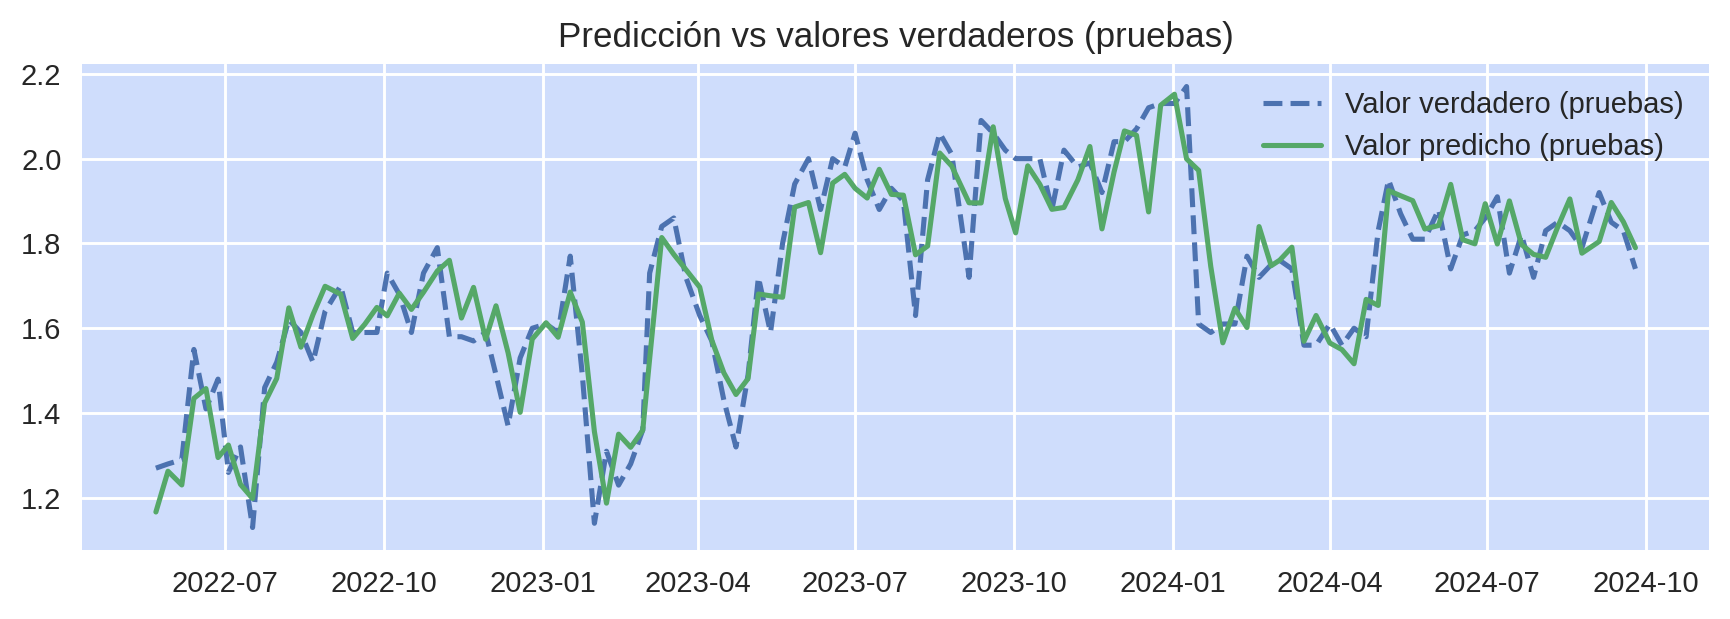

In [ ]:
x = data_test.index[k:]

plt.figure(figsize=(10,3), dpi = 105)
plt.plot(x, y_test, ls = "--", label="Valor verdadero (pruebas)")
plt.plot(x, y_pred, ls = '-', label="Valor predicho (pruebas)")
plt.title("Predicción vs valores verdaderos (pruebas)")
plt.legend();

# **Validación cruzada**

In [ ]:
params = {
      'hidden_layer_sizes' : [(20,), (40,), (80,), (160,) ], # Algunas arquitecturas propuestas.
      'activation' : ['logistic', 'tanh', 'relu']           # Funciones de activación.
 }

In [ ]:
#Grid Search para el modelo MLPRegressor
from sklearn.model_selection import GridSearchCV

tsp = TimeSeriesSplit(n_splits = 5)

gsearch = GridSearchCV(estimator = MLPRegressor(solver = 'lbfgs', #Modelo  a explorar, debido a lo pequeño del conjunto de datos.
                                                random_state=1234,
                                                max_iter= 40000,
                                                n_iter_no_change=150,
                                                validation_fraction=0.2),
                        cv = tsp,
                        param_grid = params,
                        verbose = 3)

gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation=logistic, hidden_layer_sizes=(20,);, score=-2.470 total time=   0.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(20,);, score=-5.677 total time=   0.4s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(20,);, score=0.958 total time=   0.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(20,);, score=0.967 total time=   0.4s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(20,);, score=0.770 total time=   0.6s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(40,);, score=-0.894 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(40,);, score=-4.759 total time=   0.6s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(40,);, score=0.943 total time=   1.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(40,);, score=0.997 total time=   1.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(40,);, score=0.906 total time=   1.7s
[CV 1/5] END ac

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=MLPRegressor(max_iter=40000, n_iter_no_change=150,
                                    random_state=1234, solver='lbfgs',
                                    validation_fraction=0.2),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(20,), (40,), (80,), (160,)]},
             verbose=3)

In [ ]:
# Los mejores 10 modelos con respecto a su mean_test_score.
pd.DataFrame(gsearch.cv_results_).nlargest(10, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.273174,0.133758,0.000815,0.000155,relu,"(20,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.158588,-0.149726,0.845819,0.836453,0.555139,0.449255,0.390298,1
3,0.448534,0.189904,0.001001,0.000118,logistic,"(160,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.468515,-0.171708,0.805918,0.785705,0.251158,0.427917,0.364236,2
9,0.268066,0.215236,0.000646,0.000088,relu,"(40,)","{'activation': 'relu', 'hidden_layer_sizes': (...",-1.431656,-0.248264,0.813062,0.782655,0.415348,0.066229,0.840889,3
11,3.651489,2.291910,0.000907,0.000120,relu,"(160,)","{'activation': 'relu', 'hidden_layer_sizes': (...",-1.896350,-0.688640,0.954017,0.972478,0.701336,0.008568,1.132937,4
10,0.701706,0.273025,0.000778,0.000082,relu,"(80,)","{'activation': 'relu', 'hidden_layer_sizes': (...",-2.634640,-0.401439,0.928949,0.815988,0.457313,-0.166766,1.319193,5
1,0.943588,0.507367,0.000779,0.000106,logistic,"(40,)","{'activation': 'logistic', 'hidden_layer_sizes...",-0.894492,-4.758988,0.943338,0.997358,0.906144,-0.561328,2.217131,6
4,1.092047,0.546164,0.000950,0.000067,tanh,"(20,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",-2.049637,-3.759862,0.948105,0.997051,0.959473,-0.580974,1.972994,7
7,9.433723,6.359449,0.001896,0.001108,tanh,"(160,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",-1.684386,-4.942412,0.975337,0.998924,0.987634,-0.732981,2.345329,8
6,3.663349,3.188346,0.000993,0.000183,tanh,"(80,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",-3.591531,-3.167703,0.986311,0.999041,0.970491,-0.760678,2.142570,9
0,0.414795,0.138796,0.000711,0.000122,logistic,"(20,)","{'activation': 'logistic', 'hidden_layer_sizes...",-2.470423,-5.677314,0.957836,0.966816,0.769760,-1.090665,2.639388,10


In [ ]:
# Gráficar la predicción de los datos de precios promedio.

def plot_prediction(params, ys, test_date_index):

  train_data = my_series.loc[:test_date_index[0]]
  _y_test, _y_forward, _y_last = ys
  # Graficamos los valores predichos.
  fig = go.Figure(layout = dict(
       title = f'<b>Precio promedio de aguacate </b> <br> {params}',
       dragmode= 'pan', width = 1200, height = 600))

  fig.add_trace(go.Scatter(x = train_data.index,  # Datos originales hasta la primer semana predicha. (fechas)
                          y = train_data.values, # Datos originales hasta la primer semana predicha. (precio promedio)
                          mode = 'lines',
                          name = 'Valores de entrenamiento y pruebas'))

  #Gráfica de los valores de prueba reales.
  fig.add_trace(go.Scatter(x = test_date_index,
                          y = _y_test,
                          mode='lines+markers',
                          name='Valores reales (y)'))


  #Gráfica de los valores predichos a partir de las ventanas de X_test.
  fig.add_trace(go.Scatter(x = test_date_index,
                          y = _y_forward,
                          mode = 'lines+markers',
                          name = 'Valores predichos a partir de datos reales'))

  #Gráfica de los valores predichos a partir de ventanas creadas proceduralmente.
  fig.add_trace(go.Scatter(x = test_date_index,
                          y = _y_last,
                          mode='lines+markers',
                          name='Valores predichos a partir de datos predichos'))

  fig.show(config = dict({'scrollZoom': True}))

In [ ]:
# Últimos valores de entrenamiento a usar para la predicción.
X_last = X_test[:1]

# Listas con los datos en y, empezando desde el primer valor de pruebas.
y_last = []
y_forward = []

for i in range(len(X_test)):
  # Valores predichos a partir de datos reales (X_test)
  y_pred_forward = gsearch.predict(X_test[i: i + 1])
  y_forward.append(y_pred_forward[0])

  # Valores predichos a partir de datos predichos y retroalimentados.
  y_pred_last = gsearch.predict(X_last)  # Se predice el valor siguiente a partir de datos predichos previamente.
  y_last.append(y_pred_last[0])          # Guardamos el valor predicho.

  # Creación de la nueva ventana añadiendo la última predicción.
  X_last = np.roll(X_last, -1)           # Desplazamos todos los valores hacia la izquierda con np.roll
  X_last[0,-1] = y_pred_last             # Guardamos el valor predicho en la última posición del arreglo.

#Gráficamos las 2 predicciones distintas en comparación con los valores reales.

test_date_index = data_test.index[k:]
plot_prediction(gsearch.best_params_,
                (y_test, y_forward, y_last),
                 test_date_index)

In [ ]:
# Datos predichos a partir de datos predichos.

print(f"Test Mean Squared Error: \t{mean_squared_error(y_test, y_last):.4f}")
print(f"Test Mean Absolute Error: \t{mean_absolute_error(y_test, y_last):.4f}")
print(f"Test Mean squared log error: \t{mean_squared_log_error(y_test, y_last):.4f}")

Test Mean Squared Error: 	0.0284
Test Mean Absolute Error: 	0.1370
Test Mean squared log error: 	0.0040


In [ ]:
# Datos predichos a partir de datos reales.

print(f"Test Mean Squared Error: \t{mean_squared_error(y_test, y_forward):.4f}")
print(f"Test Mean Absolute Error: \t{mean_absolute_error(y_test, y_forward):.4f}")
print(f"Test Mean squared log error: \t{mean_squared_log_error(y_test, y_forward):.4f}")

Test Mean Squared Error: 	0.0092
Test Mean Absolute Error: 	0.0677
Test Mean squared log error: 	0.0013


# Créditos
____________________
Estudiantes:
* Leonardo Velásquez
* Diego Ortiz

Universidad Nacional de Colombia - Facultad de Ingeniería